# Full Simulation (vibes)

In [118]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from IPython.display import display

# === Simulation Parameters ===
N_TURTLES = 1000
N_SIMULATIONS = 1000

first_bid = 250
second_bid = 250
    
avg_second_bid = 250

# === Reserve Price Distribution ===
def sample_reserve_prices(n):
    low = np.random.uniform(160, 200, size=n // 2)
    high = np.random.uniform(250, 320, size=n - n // 2)
    return np.concatenate([low, high])

# === Monte Carlo Simulation ===
results = []

for sim in tqdm(range(N_SIMULATIONS), desc="Simulating"):
    reserve_prices = sample_reserve_prices(N_TURTLES)
    
    pnl = 0
    for reserve in reserve_prices:
        if first_bid >= reserve and second_bid >= first_bid: # First bid wins
            pnl += 320 - first_bid
            
        elif second_bid >= reserve and first_bid >= second_bid: # Second bid wins
            if second_bid > avg_second_bid:
                pnl += 320 - second_bid
            else:
                p = ((320 - avg_second_bid) / (320 - second_bid)) ** 3
                pnl += (320 - second_bid) * p

    results.append({
        "sim": sim,
        "first_bid": first_bid,
        "second_bid": second_bid,
        "avg_other_second_bid": avg_second_bid,
        "Total PNL": pnl
    })

df_results = pd.DataFrame(results)
display(df_results.head())

Simulating: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 10506.54it/s]


sim  first_bid  second_bid  avg_other_second_bid  Total PNL
0    0        250         250                   250      35000
1    1        250         250                   250      35000
2    2        250         250                   250      35000
3    3        250         250                   250      35000
4    4        250         250                   250      35000

# One bid scenario

Simulating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6973.26it/s]


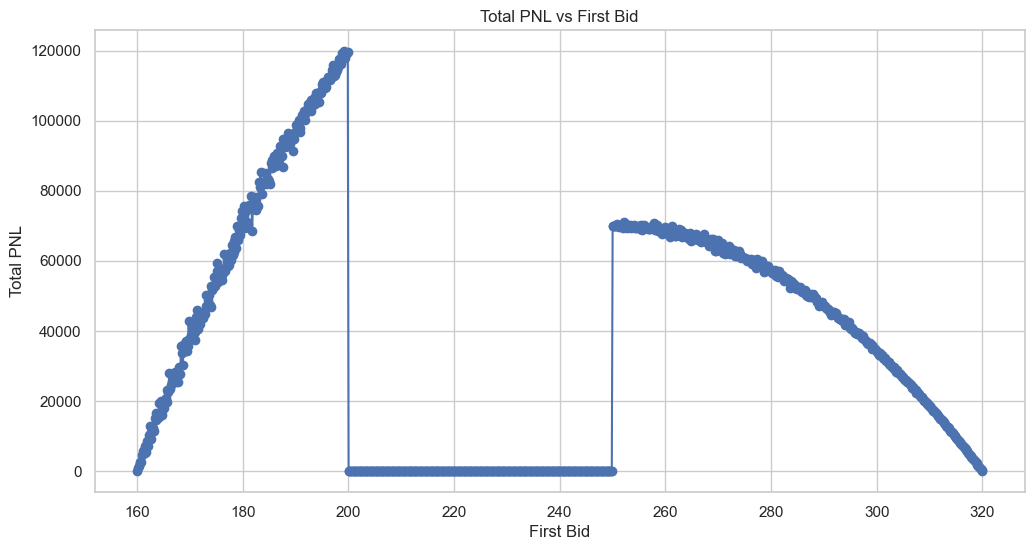

In [119]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from IPython.display import display

# === Simulation Parameters ===
N_TURTLES = 2000 # ~ real will be around 2k
N_SIMULATIONS = 1000 

bids = np.linspace(160, 320, N_SIMULATIONS)


# === Reserve Price Distribution ===
def sample_reserve_prices(n):
    low = np.random.uniform(160, 200, size=n // 2)
    high = np.random.uniform(250, 320, size=n - n // 2)
    return np.concatenate([low, high])

def sample_continuous(n):
    return np.random.uniform(160, 320, size = n)

# === Monte Carlo Simulation ===
results = []

for sim in tqdm(range(N_SIMULATIONS), desc="Simulating"):
    reserve_prices = sample_reserve_prices(N_TURTLES)
    # reserve_prices = sample_continuous(N_TURTLES)
    first_bid = bids[sim]
    
    pnl = 0
    for reserve in reserve_prices:
        if first_bid >= reserve and (first_bid<200 or first_bid>250): # First bid wins
            pnl += 320 - first_bid

    results.append({
        "sim": sim,
        "first_bid": first_bid,
        "Total PNL": pnl
    })

# Graph the results
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
plt.title("Total PNL vs First Bid")
plt.xlabel("First Bid")
plt.ylabel("Total PNL")
plt.plot(bids, [result["Total PNL"] for result in results], marker='o', linestyle='-')
plt.grid(True)
plt.show()

# Two bid scenario (no p)

Simulating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:03<00:00, 51.31it/s]


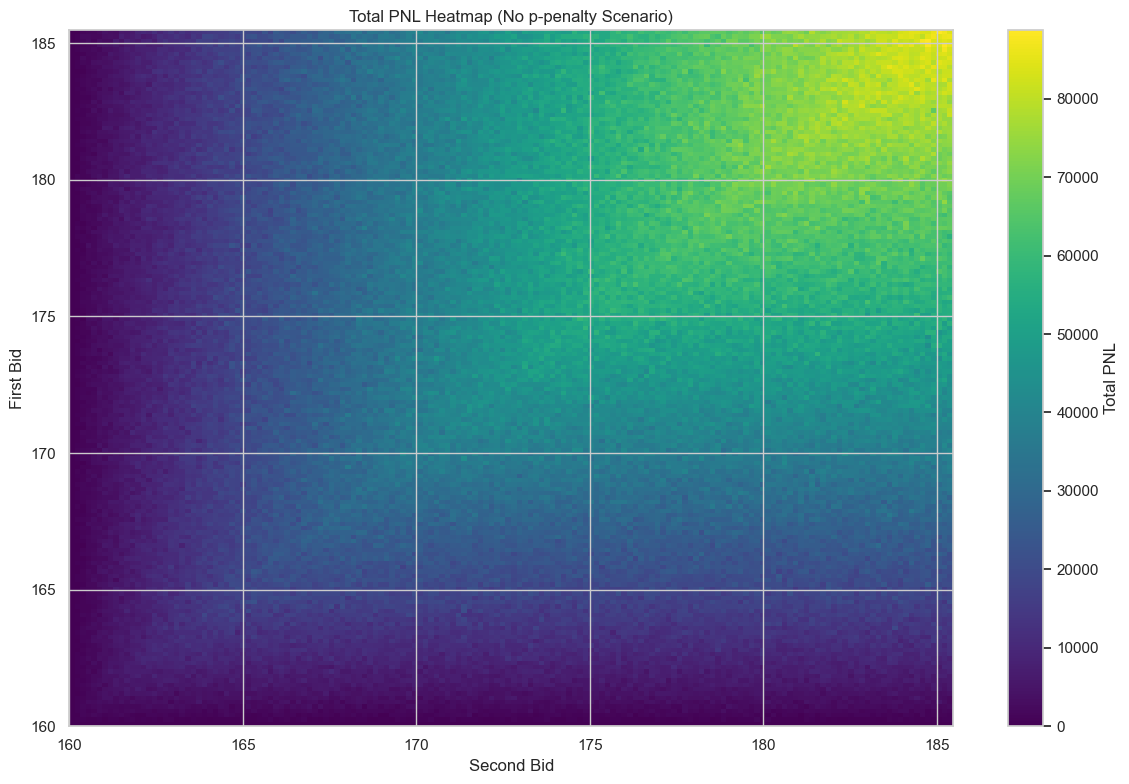

In [120]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from IPython.display import display

# === Simulation Parameters ===
N_TURTLES = 2000 # ~ real will be around 2k
N_SIMULATIONS = 160 # ^2 in this scenario

first_bids = np.linspace(160, 320, N_SIMULATIONS)
second_bids = np.linspace(160, 320, N_SIMULATIONS)

# === Reserve Price Distribution ===
def sample_reserve_prices(n):
    low = np.random.uniform(160, 200, size=n // 2)
    high = np.random.uniform(250, 320, size=n - n // 2)
    return np.concatenate([low, high])

# === Monte Carlo Simulation ===
results = []
for sim_1 in tqdm(range(N_SIMULATIONS), desc="Simulating"):
    for sim_2 in range(N_SIMULATIONS):
        reserve_prices = sample_reserve_prices(N_TURTLES)
        first_bid = bids[sim_1]
        second_bid = bids[sim_2]
        
        pnl = 0
        for reserve in reserve_prices:
            if first_bid >= reserve and second_bid >= first_bid: # First bid wins
                if (first_bid>200 and first_bid<250): # Turtles dont trade
                    continue    
                pnl += 320 - first_bid
                
            elif second_bid >= reserve and first_bid >= second_bid: # Second bid wins
                if (second_bid>200 and second_bid<250): # Turtles dont trade
                    continue   
                pnl += (320 - second_bid)

        results.append({
            "sim": sim,
            "first_bid": first_bid,
            "second_bid": second_bid,
            "Total PNL": pnl
        })

import matplotlib.pyplot as plt

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Pivot to create a grid of PNL values
pivot_df = df_results.pivot(index="first_bid", columns="second_bid", values="Total PNL")

# Plotting heatmap
plt.figure(figsize=(12, 8))
plt.title("Total PNL Heatmap (No p-penalty Scenario)")
plt.xlabel("Second Bid")
plt.ylabel("First Bid")
heatmap = plt.imshow(pivot_df.values, origin="lower", aspect="auto",
                     extent=[pivot_df.columns.min(), pivot_df.columns.max(),
                             pivot_df.index.min(), pivot_df.index.max()],
                     cmap="viridis")
plt.colorbar(heatmap, label="Total PNL")
plt.tight_layout()
plt.show()


In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Simulation Parameters
N_TURTLES = 2000
N_SIMULATIONS = 160

first_bids = np.linspace(160, 320, N_SIMULATIONS)
second_bids = np.linspace(160, 320, N_SIMULATIONS)

# Reserve Price Distribution
def sample_reserve_prices(n):
    low = np.random.uniform(160, 200, size=n // 2)
    high = np.random.uniform(250, 320, size=n - n // 2)
    return np.concatenate([low, high])

# Monte Carlo Simulation
results = []
for sim_1 in tqdm(range(N_SIMULATIONS), desc="Simulating"):
    for sim_2 in range(N_SIMULATIONS):
        reserve_prices = sample_reserve_prices(N_TURTLES)
        first_bid = first_bids[sim_1]
        second_bid = second_bids[sim_2]
        
        pnl = 0
        if second_bid >= first_bid:
            for reserve in reserve_prices:
                if first_bid >= reserve and (first_bid < 200 or first_bid > 250):
                    pnl += 320 - first_bid
                elif second_bid >= reserve and (second_bid < 200 or second_bid > 250):
                    pnl += 320 - second_bid

        results.append({
            "first_bid": first_bid,
            "second_bid": second_bid,
            "Total PNL": pnl
        })

# Convert results to DataFrame and pivot for heatmap
df_results = pd.DataFrame(results)
pivot_df = df_results.pivot(index="first_bid", columns="second_bid", values="Total PNL")


Simulating: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:02<00:00, 57.82it/s]


Maximum PNL: 137371.57232704503
First Bid: 199.24528301886792
Second Bid: 288.80503144654085
       first_bid  second_bid      Total PNL
6355  199.245283  275.723270  135466.666667
6356  199.245283  276.729560  136112.704403
6357  199.245283  277.735849  136845.283019
6358  199.245283  278.742138  136849.308176
6359  199.245283  279.748428  134601.257862


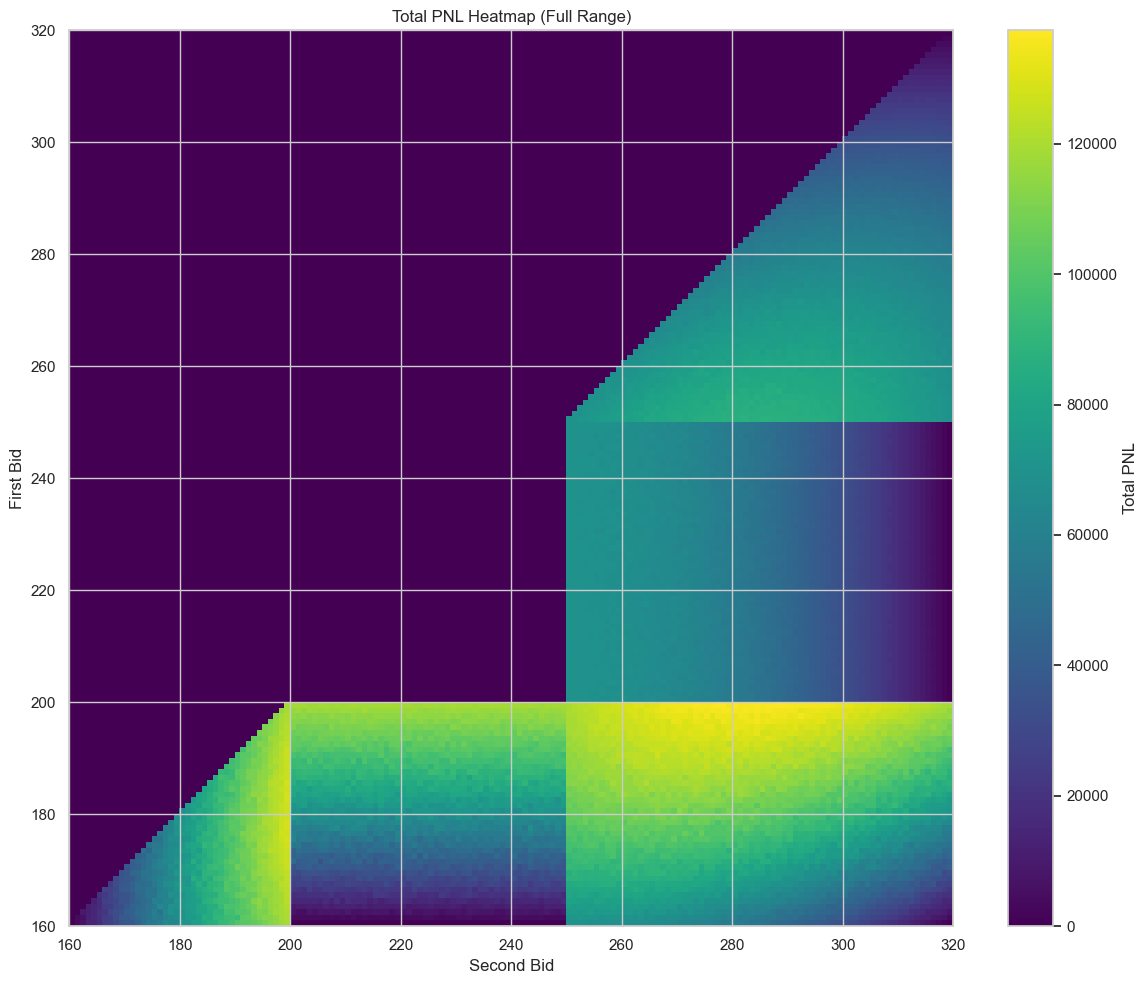

In [122]:
# print the numbers for the highest pnl

max_pnl_row = df_results.loc[df_results['Total PNL'].idxmax()]
print(f"Maximum PNL: {max_pnl_row['Total PNL']}")
print(f"First Bid: {max_pnl_row['first_bid']}")
print(f"Second Bid: {max_pnl_row['second_bid']}")

near_optimum = df_results[
    (df_results['first_bid'] > 199) & 
    (df_results['first_bid'] < 201) & 
    (df_results['second_bid'] > 275) & 
    (df_results['second_bid'] < 285)
]
near_optimum.sort_values('Total PNL', ascending=False).head(10)

print(near_optimum.head())

plt.figure(figsize=(12, 10))
plt.title("Total PNL Heatmap (Full Range)")
plt.xlabel("Second Bid")
plt.ylabel("First Bid")
heatmap = plt.imshow(pivot_df.values, origin="lower", aspect="auto",
                     extent=[pivot_df.columns.min(), pivot_df.columns.max(),
                             pivot_df.index.min(), pivot_df.index.max()],
                     cmap="viridis")
plt.colorbar(heatmap, label="Total PNL")
plt.tight_layout()
plt.show()

### Adding p

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D

N_TURTLES = 200
N_SIMULATIONS = 120
N_AVG_BID_SAMPLES = 170

first_bids = np.linspace(160, 320, N_SIMULATIONS)
second_bids = np.linspace(160, 320, N_SIMULATIONS)
avg_second_bids = np.linspace(160, 320, N_AVG_BID_SAMPLES)

def sample_reserve_prices(n):
    low = np.random.uniform(160, 200, size=n // 2)
    high = np.random.uniform(250, 320, size=n - n // 2)
    return np.concatenate([low, high])

reserves = sample_reserve_prices(N_TURTLES)

records = []
for avg_bid in tqdm(avg_second_bids, desc="Avg Second Bids"):
    for a in first_bids:
        for b in second_bids:
            if b < a:
                records.append([a, b, avg_bid, 0])
                continue
            pnl = 0

            for r in reserves:
                if a >= r:
                    pnl += 320 - a
                elif b >= r:
                    if b >= avg_bid:
                        pnl += 320 - b
                    else:
                        if b == 320:  # avoid division by zero
                            continue
                        p = ((320 - avg_bid) / (320 - b)) ** 3
                        pnl += p * (320 - b)

            records.append([a, b, avg_bid, pnl])


Avg Second Bids: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 170/170 [00:24<00:00,  6.97it/s]


### Don't want to rerun the simulation every time

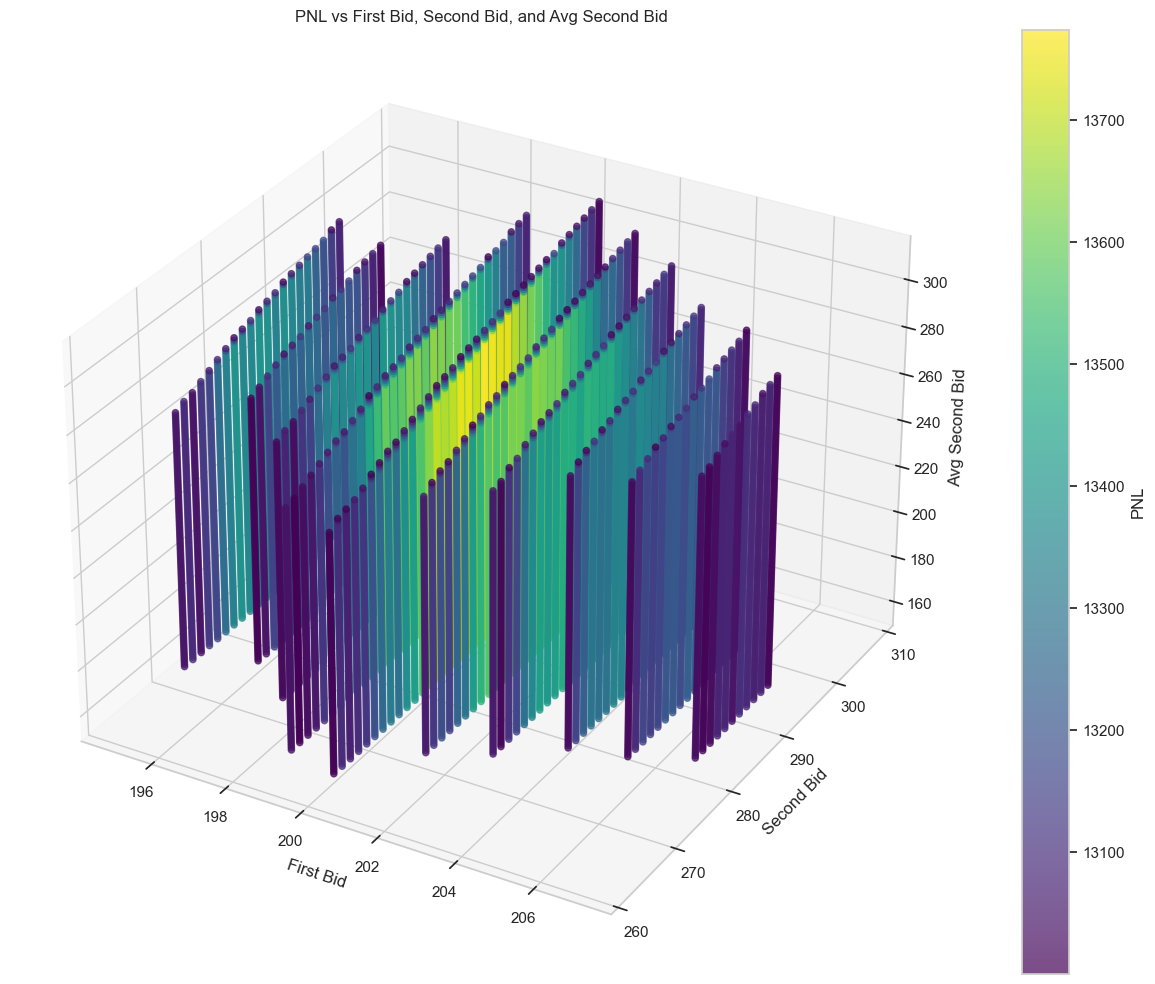

In [124]:
df_3d = pd.DataFrame(records, columns=["first_bid", "second_bid", "avg_second_bid", "pnl"])
df_3d = df_3d[df_3d["pnl"] >= 13000]

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_3d["first_bid"], df_3d["second_bid"], df_3d["avg_second_bid"],
                c=df_3d["pnl"], cmap='viridis', alpha=0.7)

ax.set_xlabel("First Bid")
ax.set_ylabel("Second Bid")
ax.set_zlabel("Avg Second Bid")
fig.colorbar(sc, label="PNL")
plt.title("PNL vs First Bid, Second Bid, and Avg Second Bid")
plt.tight_layout()
plt.show()

In [125]:
import plotly.express as px

fig = px.scatter_3d(df_3d, x="first_bid", y="second_bid", z="avg_second_bid",
                    color="pnl", color_continuous_scale="Viridis",
                    title="PNL vs First Bid, Second Bid, and Avg Second Bid")

fig.update_layout(scene=dict(
    xaxis_title="First Bid",
    yaxis_title="Second Bid",
    zaxis_title="Avg Second Bid"
))

fig.show()

# seems like bid1 should always be around 200


In [126]:
summary = []

for avg_bid in df_3d["avg_second_bid"].unique():
    subset = df_3d[df_3d["avg_second_bid"] == avg_bid]
    if not subset.empty:
        max_row = subset.loc[subset["pnl"].idxmax()]
        summary.append({
            "avg_second_bid": avg_bid,
            "best_first_bid": max_row["first_bid"],
            "best_second_bid": max_row["second_bid"],
            "max_pnl": max_row["pnl"]
        })

df_summary = pd.DataFrame(summary).sort_values("avg_second_bid")
print(df_summary)


     avg_second_bid  best_first_bid  best_second_bid       max_pnl
0        160.000000      200.336134       287.731092  13773.445378
1        160.946746      200.336134       287.731092  13773.445378
2        161.893491      200.336134       287.731092  13773.445378
3        162.840237      200.336134       287.731092  13773.445378
4        163.786982      200.336134       287.731092  13773.445378
..              ...             ...              ...           ...
152      303.905325      200.336134       303.865546  13247.619362
153      304.852071      200.336134       305.210084  13164.369748
154      305.798817      200.336134       306.554622  13109.243697
155      306.745562      200.336134       306.554622  13061.242105
156      307.692308      200.336134       307.899160  13019.159664

[157 rows x 4 columns]


### Brute forcing the best strategy against all averages

In [127]:
df_records = pd.DataFrame(records, columns=["bid1", "bid2", "avg_bid", "pnl"])

# average pnl for each (bid1, bid2) pair across all avg_bid values
strategy_avg_pnl = (
    df_records
    .groupby(["bid1", "bid2"], as_index=False)
    .agg(avg_pnl=("pnl", "mean"))
    .sort_values("avg_pnl", ascending=False)
)

print("Top 10 best (bid1, bid2) strategies across all average second bids:")
print(strategy_avg_pnl.head(10))


Top 10 best (bid1, bid2) strategies across all average second bids:
            bid1        bid2       avg_pnl
3698  200.336134  291.764706  13505.942406
3695  200.336134  287.731092  13496.443400
3696  200.336134  289.075630  13496.228482
3697  200.336134  290.420168  13491.310394
3699  200.336134  293.109244  13466.635572
3693  200.336134  285.042017  13453.611113
3700  200.336134  294.453782  13446.847549
3692  200.336134  283.697479  13439.035405
3694  200.336134  286.386555  13435.324401
3701  200.336134  295.798319  13421.615210


### Iterative Nash approximation


In [128]:
import numpy as np
import pandas as pd
from tqdm import tqdm

N_TRADERS = 200
N_ITER = 500
second_bid_options = np.linspace(250, 320, 300)  # smaller set
reserves = sample_reserve_prices(400)  # downsample reserves

pnl_lookup = {}

for bid2 in second_bid_options: # precompute the pnl for bid, avg pairs. computing on the fly is really expensive
    for avg_bid in second_bid_options:
        pnl = 0
        for r in reserves:
            if bid2 >= r and bid2 > 250:
                if bid2 >= avg_bid:
                    pnl += 320 - bid2
                else:
                    if bid2 == 320:
                        continue
                    p = ((320 - avg_bid) / (320 - bid2)) ** 3
                    pnl += p * (320 - bid2)
        pnl_lookup[(bid2, avg_bid)] = pnl
        
trader_bids = np.full(N_TRADERS, 280.0) # this starting value influences the result a lot, idt the simulation is quite right

for _ in tqdm(range(N_ITER), desc="Iterating toward Nash"):
    for i in range(N_TRADERS):
        avg_bid = (np.sum(trader_bids) - trader_bids[i]) / (N_TRADERS - 1)

        # there is likely a better way to do this without needing to round
        closest_avg = min(second_bid_options, key=lambda x: abs(x - avg_bid)) 

        best_bid = max(
            second_bid_options,
            key=lambda b: pnl_lookup[(b, closest_avg)]
        )

        trader_bids[i] = best_bid

final_avg = np.mean(trader_bids)
final_dist = pd.Series(trader_bids).value_counts().sort_index()

print(f"Final approximate Nash equilibrium bid2: {final_avg:.2f}")
print("Distribution of bid2 values among traders:")
print(final_dist)


Iterating toward Nash: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 93.35it/s]

Final approximate Nash equilibrium bid2: 279.97
Distribution of bid2 values among traders:
279.966555    200
Name: count, dtype: int64


### Approximations with synchronous updates (might be better?)

In [129]:
import numpy as np
import pandas as pd
from tqdm import tqdm

N_TRADERS = 200
N_ITER = 100
second_bid_options = np.linspace(251, 320, 100)
reserves = sample_reserve_prices(400)

pnl_lookup = {}
for bid2 in second_bid_options:
    for avg_bid in second_bid_options:
        pnl = 0
        for r in reserves:
            if bid2 >= r and bid2 > 250:
                if bid2 >= avg_bid:
                    pnl += 320 - bid2
                else:
                    if bid2 == 320:
                        continue
                    p = ((320 - avg_bid) / (320 - bid2)) ** 3
                    pnl += p * (320 - bid2)
        pnl_lookup[(bid2, avg_bid)] = pnl

trader_bids = np.full(N_TRADERS, 280.0)  # Starting guess
new_bids = np.zeros_like(trader_bids)

for iteration in tqdm(range(N_ITER), desc="Synchronous Best Response"):
    global_avg = np.mean(trader_bids)
    
    # each trader finds best response to global_avg
    for i in range(N_TRADERS):
        closest_avg = min(second_bid_options, key=lambda x: abs(x - global_avg))
        
        best_pnl = -np.inf
        best_bid = None
        for b in second_bid_options:
            pnl = pnl_lookup[(b, closest_avg)]
            if pnl > best_pnl:
                best_pnl = pnl
                best_bid = b
        new_bids[i] = best_bid

    
    trader_bids = new_bids.copy()

final_avg = np.mean(trader_bids)
final_dist = pd.Series(trader_bids).value_counts().sort_index()

print(f"Final approximate Nash equilibrium bid2: {final_avg:.2f}")
print("Distribution of bid2 values among traders:")
print(final_dist)


Synchronous Best Response: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 278.43it/s]

Final approximate Nash equilibrium bid2: 280.27
Distribution of bid2 values among traders:
280.272727    200
Name: count, dtype: int64


### Constructing a prior based on how many people acted optimally last round

In [151]:
observed_distribution = {
    20: 1.61,
    10: 0.94,
    37: 5.1179,
    90: 11.81,
    50: 8.52,
    89: 15.18,
    31: 6.99,
    80: 18.18,
    73: 24.06,
    17: 7.54,
}

nash_distribution = {
    10: 2.00,
    80: 16.15,
    37: 7.45,
    31: 6.30,
    17: 3.47,
    90: 17.84,
    50: 10.07,
    20: 4.00,
    73: 14.89,
    89: 17.83,
}

containers = [
    (10, 1),
    (80, 6),
    (37, 3),
    (31, 2),
    (17, 1),
    (90, 10),
    (50, 4),
    (20, 2),
    (73, 4),
    (89, 8)
]

nash_dist = []
obsv_dist = []

for key in observed_distribution.keys():
    net_diff = observed_distribution[key] - nash_distribution[key]
    # print(f"container {key}, nash: {nash_distribution[key]}, observed: {observed_distribution[key]}, net diff: {
    #     net_diff:.2f
    # }")

    nash_dist.append(nash_distribution[key])
    obsv_dist.append(observed_distribution[key])

nash_dist = np.array(nash_dist) / 100

squared_nash = (nash_dist ** 2)
squared_nash /= squared_nash.sum()

print(squared_nash)

obsv_dist = np.array(obsv_dist) / 100

def KL(p, q):
    return np.sum(p * np.log(p / q))

print(KL(nash_dist, obsv_dist))

[0.01187519 0.0029688  0.0411939  0.23621644 0.07526262 0.23595169
 0.02945788 0.19358222 0.16455452 0.00893674]
0.07453489146025433


### Grid search to approximate percentage of nash players (and other distributions)

In [172]:
import numpy as np
from scipy.optimize import minimize
import random

NUM_CRATES = 10

fee = 50000
base = 10000
participants = 1000

def simulate_distribution(power_bias, runs): # simulating a distribution based on payout from default inhabitants
    total_counts = [0] * len(containers)

    for _ in range(runs):
        scores = [(mult / inh)**power_bias for mult, inh in containers]
        total = sum(scores)
        weights = [s / total for s in scores]
        selections = random.choices(range(len(containers)), weights=weights, k=participants)
        for i in range(len(containers)):
            total_counts[i] += selections.count(i)
    return np.array([c / runs for c in total_counts])

greedy_dist = simulate_distribution(10, 100)
greedy_dist /= greedy_dist.sum()

def mixture_kl(alpha, obsv_dist, nash_dist):
    p_uniform = np.ones(NUM_CRATES) / NUM_CRATES # assuming people picked at random
    p_mix = alpha * nash_dist + (1 - alpha) * greedy_dist

    eps = 1e-12  
    p_obs_safe = np.clip(obsv_dist, eps, 1)
    p_mix_safe = np.clip(p_mix, eps, 1)

    return np.sum(p_obs_safe * np.log(p_obs_safe / p_mix_safe))

best_alpha = None
best_kl = float("inf")
for alpha in np.linspace(0, 1, 1000):
    cur_kl = mixture_kl(alpha, obsv_dist, nash_dist)
    if cur_kl < best_kl:
        best_kl = cur_kl
        best_alpha = alpha

print(f"Best alpha = {best_alpha:.2f}, KL={best_kl:.4f}")
print(f"That means ~{100*best_alpha:.2f}% of players are Nash.")

Best alpha = 0.88, KL=0.0601
That means ~88.19% of players are Nash.


In [173]:
print(f"{'Crate':<6} | {'Observed':>10} | {'Mixed':>10} | {'Diff':>10}")
print("-" * 42)
for i in range(NUM_CRATES):
    obs = obsv_dist[i] * 100
    mix = (best_alpha * nash_dist[i] + (1 - best_alpha) * greedy_dist[i]) * 100
    diff = obs - mix
    print(f"{i:<6} | {obs:>10.4f} | {mix:>10.4f} | {diff:>10.4f}")


Crate  |   Observed |      Mixed |       Diff
------------------------------------------
0      |     1.6100 |     3.5450 |    -1.9350
1      |     0.9400 |     2.0417 |    -1.1017
2      |     5.1179 |     6.7018 |    -1.5839
3      |    11.8100 |    17.0216 |    -5.2116
4      |     8.5200 |    12.1273 |    -3.6073
5      |    15.1800 |    15.7315 |    -0.5515
6      |     6.9900 |     5.7075 |     1.2825
7      |    18.1800 |    14.2582 |     3.9218
8      |    24.0600 |    19.7592 |     4.3008
9      |     7.5400 |     3.1062 |     4.4338


### Attempting to solve for the alpha and distribution

In [183]:
import numpy as np
from scipy.optimize import minimize

# Make sure p_obs and p_nash are normalized numpy arrays
p_obs = obsv_dist / np.sum(obsv_dist)
p_nash = nash_dist / np.sum(nash_dist)
n = len(p_obs)

# Initial guess: alpha = 0.5, p_alt = uniform
x0 = np.concatenate(([0.5], np.ones(n) / n))

# Bounds: alpha ∈ [0, 1], p_alt ∈ [0, 1]
bounds = [(0, 1)] + [(0, 1)] * n

# Constraint: sum of p_alt == 1
constraints = [{
    'type': 'eq',
    'fun': lambda x: np.sum(x[1:]) - 1
}]

def kl_mixture_objective(x, p_obs, p_nash):
    alpha = x[0]
    p_alt = x[1:]
    
    # Mixture distribution
    p_mix = alpha * p_nash + (1 - alpha) * p_alt

    # Avoid log(0)
    eps = 1e-12
    p_obs_safe = np.clip(p_obs, eps, 1)
    p_mix_safe = np.clip(p_mix, eps, 1)

    return np.sum(p_obs_safe * np.log(p_obs_safe / p_mix_safe))

# Run the optimization
res = minimize(
    kl_mixture_objective,
    x0,
    args=(p_obs, p_nash),
    bounds=bounds,
    constraints=constraints,
    options={'disp': True}
)

# Extract results
alpha_opt = res.x[0]
p_alt_opt = res.x[1:]

print(f"Optimal alpha (Nash fraction): {alpha_opt:.4f}")
print("Optimal alternative distribution:")
for i, prob in enumerate(p_alt_opt):
    print(f"Crate {i}: {containers[i][0]} -> {prob:.4f}")

# Optional: compare mixture to observed
p_mix = alpha_opt * p_nash + (1 - alpha_opt) * p_alt_opt

print("\nSide-by-side comparison:")
print(f"{'Crate':<6} | {'Observed':>10} | {'Mixture':>10} | {'Diff':>10}")
print("-" * 42)
for i in range(n):
    print(f"{i:<6} | {p_obs[i]:>10.4f} | {p_mix[i]:>10.4f} | {(p_obs[i] - p_mix[i]):>10.4f}")


Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.3463530063602156e-07
            Iterations: 16
            Function evaluations: 197
            Gradient evaluations: 16
Optimal alpha (Nash fraction): 0.4025
Optimal alternative distribution:
Crate 0: 10 -> 0.0000
Crate 1: 80 -> 0.0023
Crate 2: 37 -> 0.0355
Crate 3: 31 -> 0.0776
Crate 4: 17 -> 0.0751
Crate 5: 90 -> 0.1344
Crate 6: 50 -> 0.0744
Crate 7: 20 -> 0.1954
Crate 8: 73 -> 0.3026
Crate 9: 89 -> 0.1028

Side-by-side comparison:
Crate  |   Observed |    Mixture |       Diff
------------------------------------------
0      |     0.0161 |     0.0161 |     0.0000
1      |     0.0094 |     0.0094 |    -0.0000
2      |     0.0512 |     0.0512 |     0.0000
3      |     0.1182 |     0.1182 |    -0.0000
4      |     0.0852 |     0.0854 |    -0.0002
5      |     0.1519 |     0.1521 |    -0.0002
6      |     0.0699 |     0.0698 |     0.0001
7      |     0.1819 |     0.1817 |     0.0002
8      |  